In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
#columns_names= ['sepal length','sepal_width','petal_length','petal_width','Class_labels']

In [146]:
Iris= pd.read_csv(r'E:\IRIS\IRIS.csv')

In [147]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [149]:
Iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [150]:
Iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [151]:
Iris.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [152]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [153]:
Iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [154]:
Iris.describe(include='all')


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


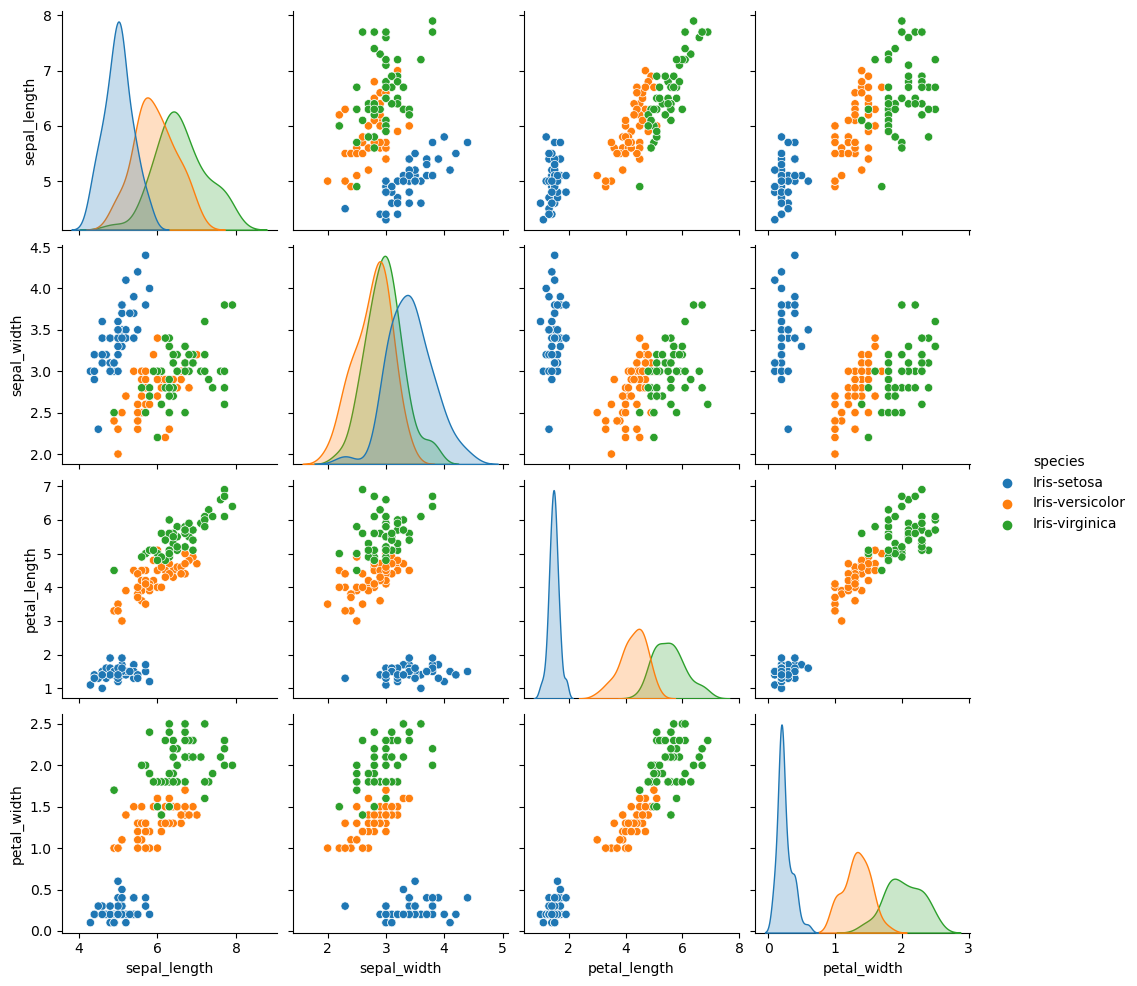

In [155]:
sns.pairplot(Iris,hue='species')
plt.show()

In [156]:
Iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [157]:
import plotly.express as px

fig1 = px.histogram(Iris, x="species", color="sepal_length")  
fig1.show()

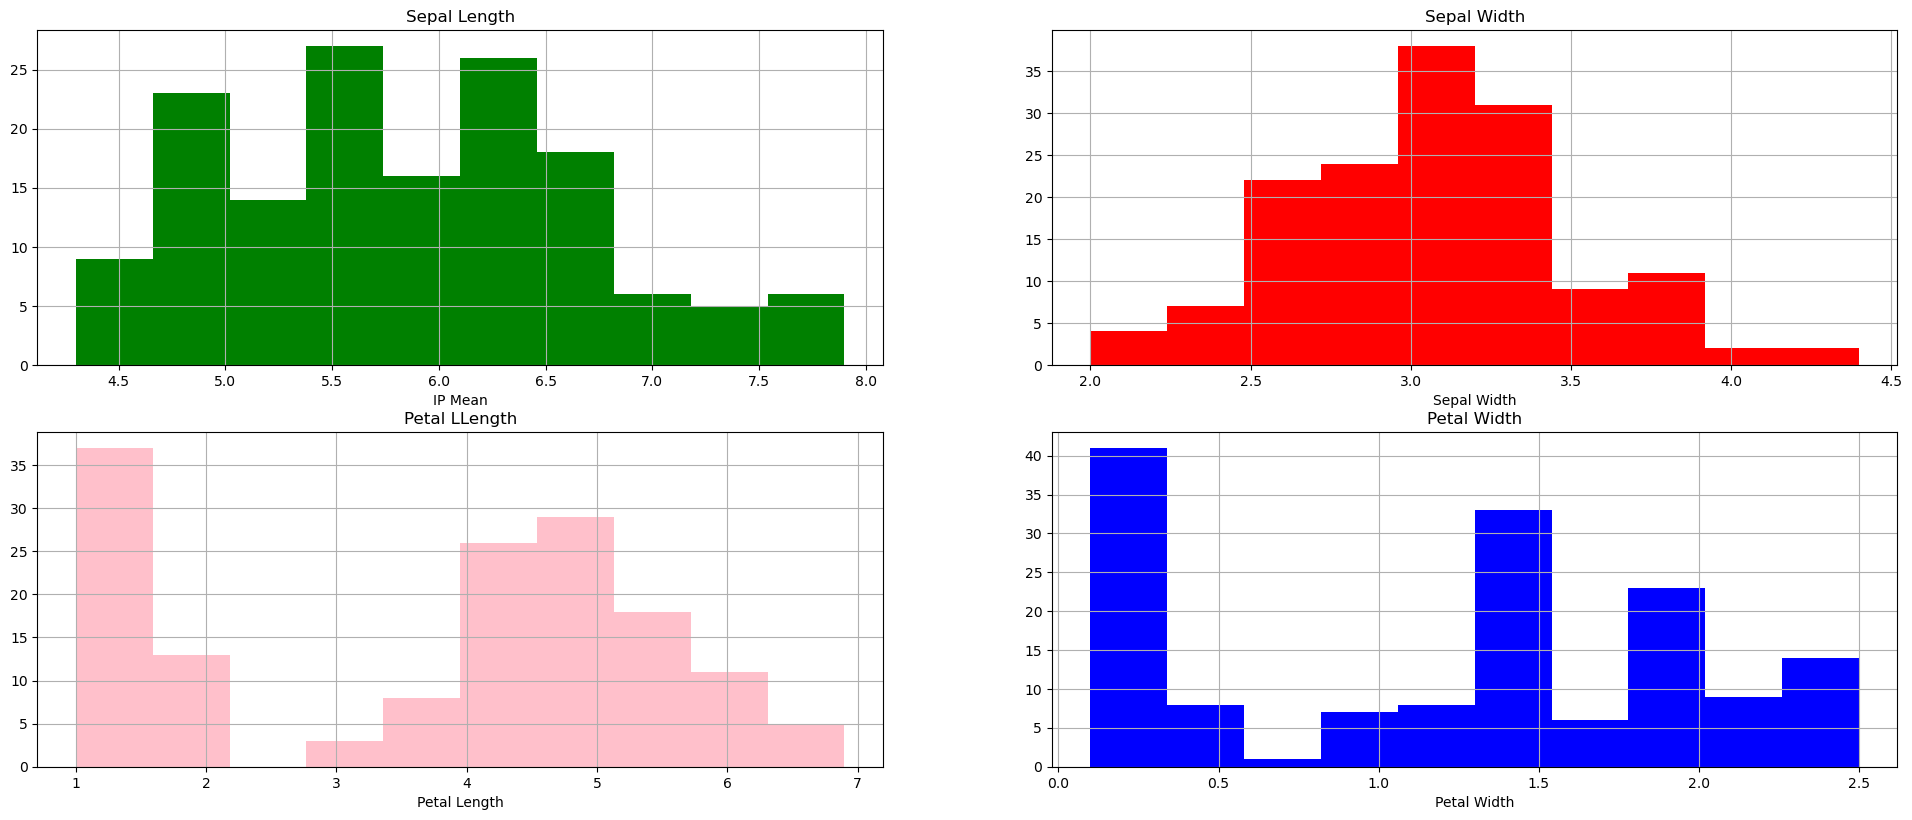

In [158]:
plt.figure(figsize=(24, 20))

#subplot1
plt.subplot(4, 2, 1)
fig = Iris['sepal_length'].hist(bins=10, color='green')  # Set the color to green
fig.set_xlabel('IP Mean')
fig.set_title('Sepal Length')

# Subplot 2
plt.subplot(4, 2, 2)
fig = Iris['sepal_width'].hist(bins=10, color='red')
fig.set_xlabel('Sepal Width')
fig.set_title('Sepal Width')

# Subplot 3
plt.subplot(4, 2, 3)
fig = Iris['petal_length'].hist(bins=10, color='pink')
fig.set_xlabel('Petal Length')
fig.set_title('Petal LLength')

# Subplot 4
plt.subplot(4, 2, 4)
fig = Iris['petal_width'].hist(bins=10, color='blue')
fig.set_xlabel('Petal Width')
fig.set_title('Petal Width')

plt.show()



<Axes: xlabel='species', ylabel='sepal_length'>

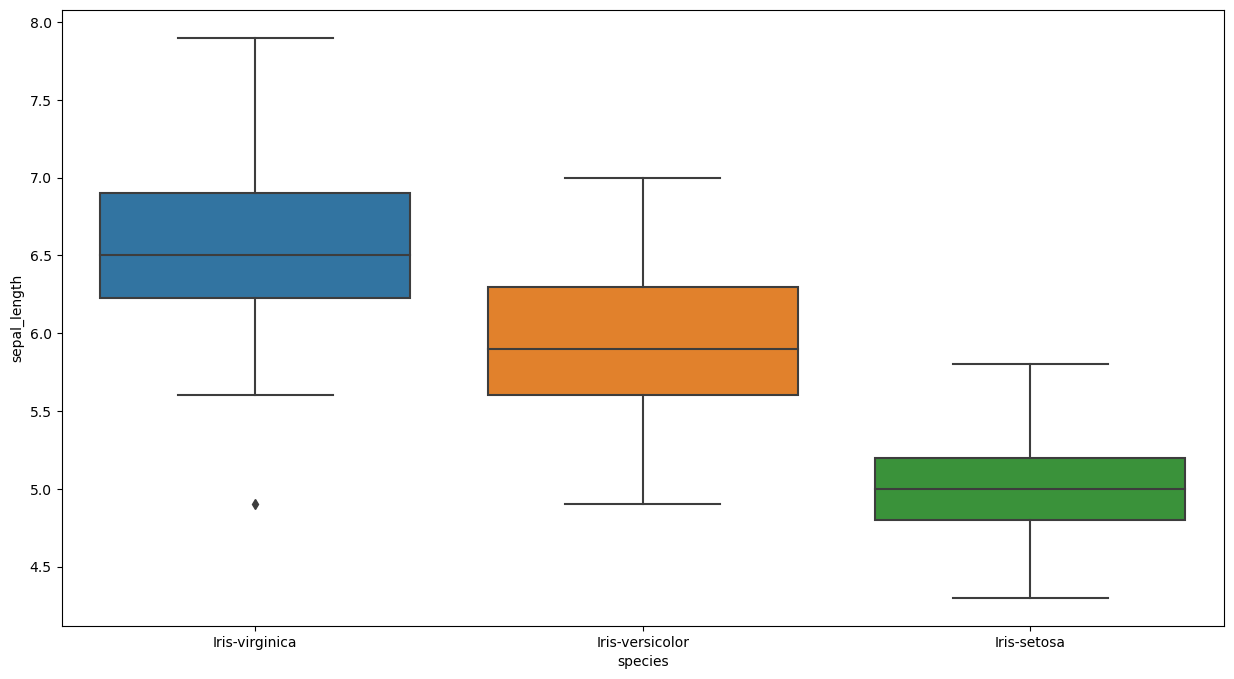

In [159]:
#RELATION BTWN sepal length and spexies
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_length',data=Iris.sort_values('sepal_length',ascending=False))

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

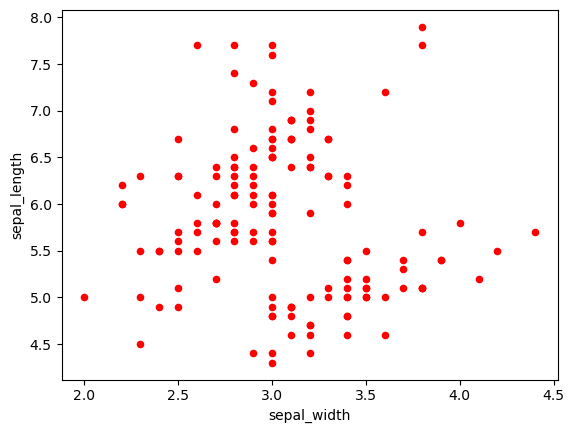

In [160]:
#Correlation between Sepal Width and Species
Iris.plot(kind='scatter', x='sepal_width',y='sepal_length' , c='red')

In [161]:
X = Iris.iloc[:,:-1].values #Set our training data

y = Iris.iloc[:,-1].values #We'll use this just for visualization as clustering doesn't require labels

In [162]:
fig = px.scatter(data_frame=Iris, x='sepal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [163]:
fig = px.scatter(data_frame=Iris, x='sepal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [164]:
fig = px.scatter(data_frame=Iris, x='petal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [165]:
fig = px.scatter(data_frame=Iris, x='petal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [166]:
encoded_Iris= pd.get_dummies(Iris,columns=['species'])
correlation_matrxi= encoded_Iris.corr()
print(correlation_matrxi)

                         sepal_length  sepal_width  petal_length  petal_width  \
sepal_length                 1.000000    -0.109369      0.871754     0.817954   
sepal_width                 -0.109369     1.000000     -0.420516    -0.356544   
petal_length                 0.871754    -0.420516      1.000000     0.962757   
petal_width                  0.817954    -0.356544      0.962757     1.000000   
species_Iris-setosa         -0.717416     0.595601     -0.922688    -0.887510   
species_Iris-versicolor      0.079396    -0.464700      0.201587     0.118376   
species_Iris-virginica       0.638020    -0.130901      0.721102     0.769134   

                         species_Iris-setosa  species_Iris-versicolor  \
sepal_length                       -0.717416                 0.079396   
sepal_width                         0.595601                -0.464700   
petal_length                       -0.922688                 0.201587   
petal_width                        -0.887510               

In [167]:
numeric_Iris=Iris.select_dtypes(include=['number'])
correlation_matrix= numeric_Iris.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


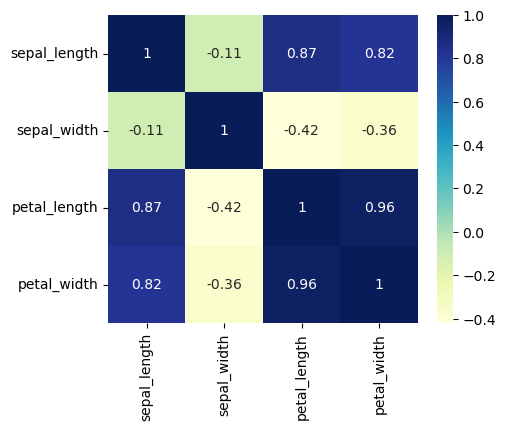

In [168]:
numeric_Iris= Iris.select_dtypes(include='number')
corr= numeric_Iris.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True ,ax=ax,cmap='YlGnBu')
plt.show()

In [169]:
from sklearn.model_selection import train_test_split
X=Iris.drop(columns=['species'])
Y=Iris['species']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [170]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,Y_train)
acc_lr=model1.score(X_test,Y_test)*100
print("Accuracy(Logistic Regression):",acc_lr)

Accuracy(Logistic Regression): 97.77777777777777


In [171]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,Y_train)
acc_k=model2.score(X_test,Y_test)*100
print("Accuracy(KNN): " ,acc_k)

Accuracy(KNN):  97.77777777777777


In [172]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)
acc_rfc=model3.score(X_test,Y_test)*100
print("Accuracy(Random Forest Classifier): " ,acc_rfc)

Accuracy(Random Forest Classifier):  95.55555555555556


In [173]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train,Y_train)
acc_DTC=model3.score(X_test,Y_test)*100
print("Accuracy(Decision Tree Classifier): " ,acc_DTC)

Accuracy(Decision Tree Classifier):  95.55555555555556


<Axes: xlabel='accuracy', ylabel='models'>

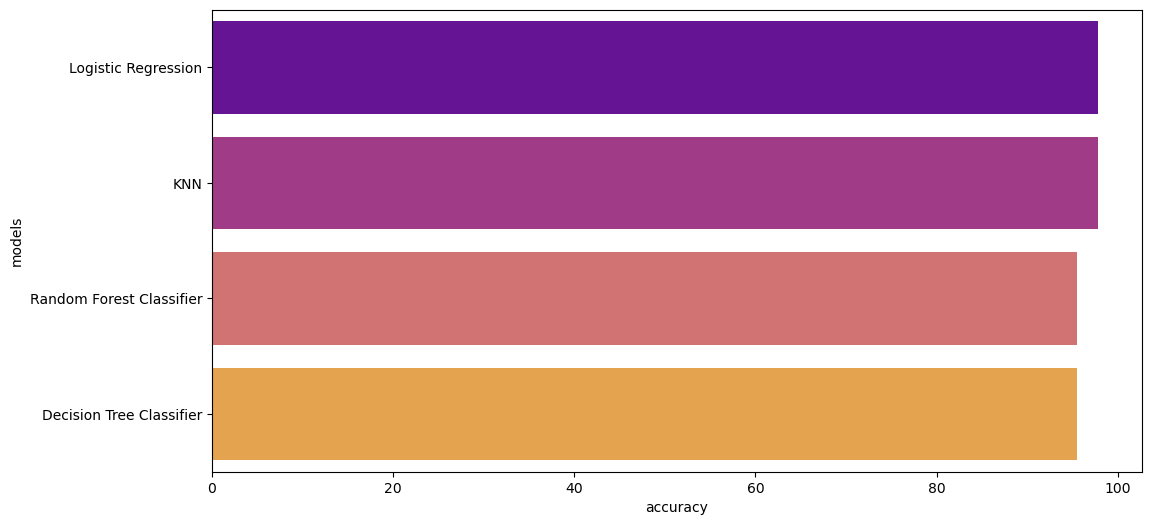

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
model_acc =[acc_lr,acc_k,acc_rfc,acc_DTC]
model_name= ['Logistic Regression','KNN','Random Forest Classifier','Decision Tree Classifier']
plt.xlabel('accuracy')
plt.ylabel('models')
sns.barplot(x=model_acc, y=model_name, palette='plasma')

In [175]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
y_pred =model2.predict(X_test)
print(classification_report(Y_test,y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [176]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [177]:
cf= confusion_matrix(Y_test,y_pred)
print(cf)

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]


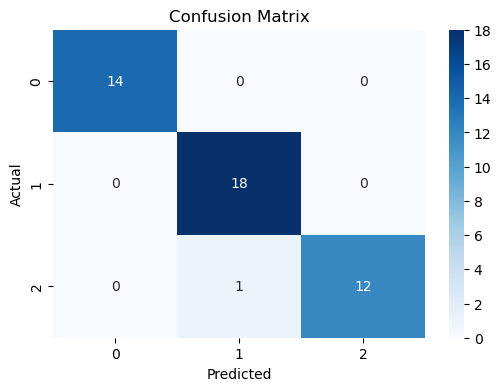

In [180]:
#here 0=Iris-setosa,  1=Iris-versicolor,  2= Iris-virginica 

plt.figure(figsize=(6, 4))
sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()